# Examples

In [1]:
%load_ext autoreload
%autoreload complete

import pathlib

import matplotlib.pyplot as plt
import numpy as np

import splib07

## Open library archive

In [2]:
%%time 
data_dir = pathlib.Path.cwd().joinpath("../data")
usgs_archive_file = data_dir / "usgs_splib07.zip"

usgs_lib = splib07.Splib07(usgs_archive_file)

CPU times: user 2.96 s, sys: 111 ms, total: 3.07 s
Wall time: 3.07 s


## Browse the available spectra

In [3]:
available_spectra = sorted(usgs_lib.list_spectra())

print(f"# spectra: {len(available_spectra)}")
display(available_spectra[:20] + ["..."] + available_spectra[-20:])

# spectra: 2450


['1-2-3-Trimethylbenzene_85K_ASDHRb_AREF',
 '1-2-3-Trimethylbenzene_85K_NIC4bb_RREF',
 '2-3-Benzanthracene_SA-B2403_NIC4aa_RREF',
 '2-4-Diaminopyrimidine_468231_ASDHRa_AREF',
 '2-4-Diaminopyrimidine_468231_NIC4aa_RREF',
 '2-4-Diaminopyrimidine_85K_ASDHRa_AREF',
 '2-4-Diaminopyrimidine_90K_NIC4aa_RREF',
 '2-4Diamino6hydroxypyrim_100K_NIC4aa_RREF',
 '2-4Diamino6hydroxypyrim_85K_ASDHRa_AREF',
 '2-4Diamino6hydroxypyrimidin_NIC4aa_RREF',
 '2-4Diamino6hydroxypyrimidine_ASDHRa_AREF',
 '2-6-Diaminopurine_247847_85K_ASDHRa_AREF',
 '2-6-Diaminopurine_247847_90K_NIC4aa_RREF',
 '2-6-Diaminopurine_247847_ASDHRa_AREF',
 '2-6-Diaminopurine_247847_NIC4aa_RREF',
 '2-Aminopurine_SA-A3509_85K_ASDHRa_AREF',
 '2-Aminopurine_SA-A3509_90K_NIC4aa_RREF',
 '2-Aminopurine_SA-A3509_ASDHRa_AREF',
 '2-Aminopurine_SA-A3509_NIC4aa_RREF',
 '2-Methylnaptha_SA-442359_85K_ASDHRa_AREF',
 '...',
 'Zincite+Franklin_HS147.3B_BECKb_AREF',
 'Zincite+Franklin_HS147.3B_NIC4bb_RREF',
 'Zincite+Franklin_HS147.4B_ASDFRb_AREF',
 'Zi

## Search for a spectrum name

In [4]:
display(usgs_lib.search_spectra("cotton"))

['Cotton_Fabric_GDS437_White_ASDFRa_AREF',
 'Paper_Cotton_Bond_PAPR1_100%_ASDFRa_AREF']

## Browse the available resamplings

In [5]:
available_resamplings = list(splib07.Sampling)
display(available_resamplings)

[<Sampling.MEASURED: 'splib07a'>,
 <Sampling.OVERSAMPLED: 'splib07b'>,
 <Sampling.ASD: 'splib07b_cvASD'>,
 <Sampling.AVIRIS_1995: 'splib07b_cvAVIRISc1995'>,
 <Sampling.AVIRIS_1996: 'splib07b_cvAVIRISc1996'>,
 <Sampling.AVIRIS_1997: 'splib07b_cvAVIRISc1997'>,
 <Sampling.AVIRIS_1998: 'splib07b_cvAVIRISc1998'>,
 <Sampling.AVIRIS_1999: 'splib07b_cvAVIRISc1999'>,
 <Sampling.AVIRIS_2000: 'splib07b_cvAVIRISc2000'>,
 <Sampling.AVIRIS_2001: 'splib07b_cvAVIRISc2001'>,
 <Sampling.AVIRIS_2005: 'splib07b_cvAVIRISc2005'>,
 <Sampling.AVIRIS_2006: 'splib07b_cvAVIRISc2006'>,
 <Sampling.AVIRIS_2009: 'splib07b_cvAVIRISc2009'>,
 <Sampling.AVIRIS_2010: 'splib07b_cvAVIRISc2010'>,
 <Sampling.AVIRIS_2011: 'splib07b_cvAVIRISc2011'>,
 <Sampling.AVIRIS_2012: 'splib07b_cvAVIRISc2012'>,
 <Sampling.AVIRIS_2013: 'splib07b_cvAVIRISc2013'>,
 <Sampling.AVIRIS_2014: 'splib07b_cvAVIRISc2014'>,
 <Sampling.CRISM_GLOBAL: 'splib07b_cvCRISM-global'>,
 <Sampling.CRISM_TARGET: 'splib07b_cvCRISMjMTR3'>,
 <Sampling.HYMAP_2007: 's

## Load a spectrum

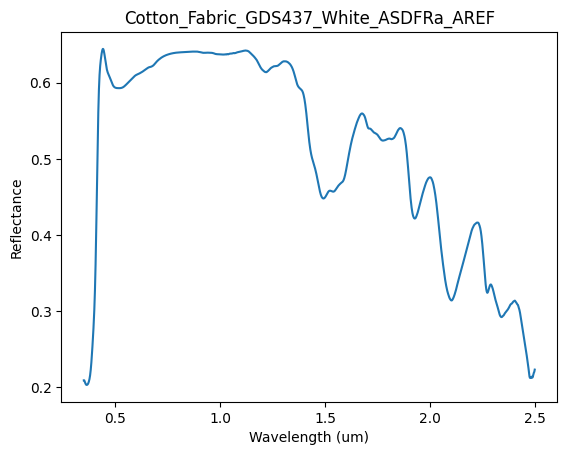

In [6]:
name = "Cotton_Fabric_GDS437_White_ASDFRa_AREF"
spectrum = usgs_lib.load_spectrum(name)

fig, ax = plt.subplots()
ax.plot(spectrum.wavelengths, spectrum.spectrum)
ax.set_xlabel("Wavelength (um)")
ax.set_ylabel("Reflectance")
ax.set_title(name);

## Load a particular spectrum with a particular resampling

In [7]:
name = "Seawater_Coast_Chl_SW1_BECKa_AREF"
print(usgs_lib.load_spectrum(name, resample=splib07.Sampling.MEASURED).spectrum.size)
print(usgs_lib.load_spectrum(name, resample=splib07.Sampling.OVERSAMPLED).spectrum.size)
print(usgs_lib.load_spectrum(name, resample=splib07.Sampling.ASD).spectrum.size)

480
3961
2151


## Load a spectrum as a [`SpectralLibrary`](https://www.spectralpython.net/class_func_ref.html#spectral.io.envi.SpectralLibrary) from the [`spectral`](https://pypi.org/project/spectral/) distribution

In [8]:
spec_lib = usgs_lib.load_spectrum("Seawater_Coast_Chl_SW1_BECKa_AREF", format="spectral")

print(spec_lib)
print(spec_lib.spectra.flat[:5])
print(spec_lib.names)
print(spec_lib.bands.centers[:5])
print(spec_lib.bands.bandwidths[:5])
print(spec_lib.bands.band_unit)

[0.02851183 0.02851183 0.02851183 0.02851183 0.02851183]
['Seawater_Coast_Chl_SW1_BECKa_AREF']
[0.2051, 0.21310002, 0.2211, 0.2291, 0.2361]
[0.0080000004, 0.0080000004, 0.0080000004, 0.0070000002, 0.0060000001]
micrometer


## Load spectrum resampled to particular wavelengths

In [9]:
wavelengths = np.linspace(0.5, 2.5, 10)

spec = usgs_lib.load_spectrum("Seawater_Coast_Chl_SW1_BECKa_AREF", resample=wavelengths)
print(spec.spectrum)
print(spec.wavelengths)

[0.03251023 0.02163642 0.01975156 0.0193604  0.0190043  0.01862108
 0.01811341 0.01717422 0.01577636 0.01130907]
[0.5        0.72222222 0.94444444 1.16666667 1.38888889 1.61111111
 1.83333333 2.05555556 2.27777778 2.5       ]
